In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import datetime

date_var = datetime.datetime.now().strftime("%Y%m%d")

In [3]:
import spatialdata as sd

/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [4]:
data_dir = os.path.abspath("../data")
!ls -l $data_dir

lrwxrwxrwx 1 ra98gaq pn52ra 53 Jun 26 20:23 /dss/dsshome1/0C/ra98gaq/Git/cellseg-benchmark/data -> /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark


In [5]:
sample_name = "foxf2_s2_r1"

# Load sdata

In [6]:
sdata_path = os.path.join(data_dir, "samples", sample_name, "sdata_z3.zarr")
if "sdata" not in locals():
    sdata = sd.read_zarr(sdata_path)

/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/zarr/creation.py:614: UserWarnin

In [7]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/samples/foxf2_s2_r1/sdata_z3.zarr
├── Images
│     └── 'foxf2_s2_r1_z3': DataTree[cyx] (8, 54456, 65675), (8, 27228, 32837), (8, 13614, 16418), (8, 6807, 8209), (8, 3403, 4104)
├── Points
│     └── 'foxf2_s2_r1_transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     ├── 'boundaries_Baysor_2D_Cellpose_1_DAPI_PolyT_0.2': GeoDataFrame shape: (181678, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_Cellpose_1_DAPI_PolyT_0.8': GeoDataFrame shape: (164856, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2': GeoDataFrame shape: (174569, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8': GeoDataFrame shape: (151323, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_Cellpose_1_nuclei_model_1.0': GeoDataFrame shape: (180656, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_Cellpose_2_DAPI_PolyT_0.2': GeoDataFrame shape:

In [8]:
adata_keys = list(sdata.tables.keys())
adata_keys

['adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.2',
 'adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.8',
 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2',
 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8',
 'adata_Baysor_2D_Cellpose_1_nuclei_model_1.0',
 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.2',
 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.8',
 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2',
 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8',
 'adata_Baysor_3D',
 'adata_Cellpose_1_DAPI_PolyT',
 'adata_Cellpose_1_DAPI_Transcripts',
 'adata_Cellpose_1_Merlin',
 'adata_Cellpose_1_nuclei_model',
 'adata_Cellpose_2_DAPI_PolyT',
 'adata_Cellpose_2_DAPI_Transcripts',
 'adata_ComSeg',
 'adata_Negative_Control_Rastered_10',
 'adata_Negative_Control_Rastered_25',
 'adata_Negative_Control_Rastered_5',
 'adata_Negative_Control_Voronoi',
 'adata_Proseg_Cellpose_1_DAPI_PolyT',
 'adata_Proseg_Cellpose_1_DAPI_Transcripts',
 'adata_Proseg_Cellpose_1_nuclei_model',
 'adata_Proseg_Cellpose_2_DAPI_PolyT',
 'adat

In [9]:
len(adata_keys)

33

In [10]:
# check which adata keys don't have a column containing "cell_outlier" in their obs dataframe
missing_outlier_keys = []
for key in adata_keys:
    if not any("cell_outlier" in col for col in sdata[key].obs.columns):
        missing_outlier_keys.append(key)
missing_outlier_keys

['adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.2',
 'adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.8',
 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2',
 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8',
 'adata_Baysor_2D_Cellpose_1_nuclei_model_1.0',
 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.2',
 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.8',
 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2',
 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8',
 'adata_Baysor_3D',
 'adata_Cellpose_1_DAPI_PolyT',
 'adata_Cellpose_1_DAPI_Transcripts',
 'adata_Cellpose_1_Merlin',
 'adata_Cellpose_1_nuclei_model',
 'adata_Cellpose_2_DAPI_PolyT',
 'adata_Cellpose_2_DAPI_Transcripts',
 'adata_ComSeg',
 'adata_Negative_Control_Rastered_10',
 'adata_Negative_Control_Rastered_25',
 'adata_Negative_Control_Rastered_5',
 'adata_Negative_Control_Voronoi',
 'adata_Proseg_Cellpose_1_DAPI_PolyT',
 'adata_Proseg_Cellpose_1_DAPI_Transcripts',
 'adata_Proseg_Cellpose_1_nuclei_model',
 'adata_Proseg_Cellpose_2_DAPI_PolyT',
 'adat

In [35]:
sdata["boundaries_vpt_3D_DAPI_PolyT"]

,ID,EntityID,ZIndex,ZLevel,geometry
36246,36246,2688188500005100003,1,3.0,"MULTIPOLYGON (((1740.877 138.674, 1742.005 139..."
36361,36361,2688188500005100003,4,7.5,"MULTIPOLYGON (((1736.16 138.803, 1737.758 141...."
36335,36335,2688188500005100003,3,6.0,"MULTIPOLYGON (((1736.718 138.84, 1739.756 141...."
36300,36300,2688188500005100003,2,4.5,"MULTIPOLYGON (((1738.864 138.158, 1739.925 139..."
36247,36247,2688188500005100004,1,3.0,"MULTIPOLYGON (((1637.245 138.343, 1637.643 139..."
...,...,...,...,...,...
429289,429289,2688188500541100099,3,6.0,"MULTIPOLYGON (((6100.305 5524.353, 6100.659 55..."
429290,429290,2688188500541100102,3,6.0,"MULTIPOLYGON (((6223.201 5545.039, 6223.035 55..."
429283,429283,2688188500541100115,2,4.5,"MULTIPOLYGON (((6144.028 5607.434, 6144.002 56..."
429284,429284,2688188500541100116,2,4.5,"MULTIPOLYGON (((6142.313 5610.377, 6142.183 56..."


# Metrics 2D

In [106]:
import ast
import math
import warnings

import pandas as pd
from shapely.geometry import Polygon


def compute_cell_morphology_2d(
    sdata, add_to_adata=False, zindex=3, verbose=True, return_results=False
):
    """Compute and add 2D cell morphology metrics to adata.obs for each dataset in SpatialData."""
    results_dict = {}

    for boundaries_name, boundaries in sdata.shapes.items():
        if not boundaries_name.startswith("boundaries_"):
            continue

        dataset_name = boundaries_name.replace("boundaries_", "")
        table_name = f"adata_{dataset_name}"

        if table_name not in sdata.tables:
            warnings.warn(
                f"Missing adata {table_name} for {boundaries_name}. Skipping."
            )
            continue

        adata = sdata.tables[table_name]

        if boundaries.empty or "geometry" not in boundaries:
            warnings.warn(f"Empty/invalid geometry in {boundaries_name}. Skipping.")
            continue

        # Convert geometry from string to Polygon if needed
        boundaries = boundaries.copy()
        boundaries["geometry"] = boundaries["geometry"].apply(
            lambda x: Polygon(ast.literal_eval(x)) if isinstance(x, str) else x
        )

        # Handle ZIndex if present
        zindex_0 = zindex
        if "ZIndex" in boundaries:
            unique_z = boundaries["ZIndex"].unique()
            if len(unique_z) == 1:
                zindex_0 = unique_z[0]
            boundaries = boundaries[boundaries["ZIndex"] == zindex_0]
        # not handled yet: 3D shapes

        # Calculate basic metrics
        boundaries["area"] = boundaries["geometry"].apply(lambda x: x.area)
        boundaries["perimeter"] = boundaries["geometry"].apply(lambda x: x.length)
        boundaries["circularity"] = (
            4 * math.pi * boundaries["area"] / (boundaries["perimeter"] ** 2)
        )
        boundaries["solidity"] = boundaries["geometry"].apply(
            lambda x: x.area / x.convex_hull.area if x.area > 0 else np.nan
        )
        boundaries["equiv_diameter"] = np.sqrt(4 * boundaries["area"] / math.pi)

        # Calculate elongation index safely
        def calculate_elongation(geom):
            try:
                if geom.is_empty:
                    return np.nan

                mbr = geom.minimum_rotated_rectangle
                coords = np.array(mbr.exterior.coords.xy)[
                    :, :-1
                ].T  # Convert to array, drop repeated point

                # Calculate distances between consecutive points
                dx = np.diff(np.append(coords[:, 0], coords[0, 0]))
                dy = np.diff(np.append(coords[:, 1], coords[0, 1]))
                edge_lengths = np.sqrt(dx**2 + dy**2)

                # Get unique edge lengths (rectangle has 2 pairs of equal sides)
                unique_lengths = np.sort(np.unique(np.round(edge_lengths, 10)))

                if len(unique_lengths) < 2:
                    return np.nan  # Something is wrong with the shape

                # Elongation = 1 - (short side / long side)
                return 1 - (unique_lengths[0] / unique_lengths[1])
            except (IndexError, ZeroDivisionError, ValueError, AttributeError):
                return np.nan

        # Elongation index (Ranges from 0, perfect circle, to 1, completely elongated line)
        boundaries["elongation"] = boundaries["geometry"].apply(calculate_elongation)

        # Convert indices to strings for matching with adata.obs
        boundaries.index = boundaries.index.astype(str)

        # Write to adata if needed
        if add_to_adata:
            common_indices = adata.obs.index.intersection(boundaries.index)
            metric_cols = [
                "area",
                "perimeter",
                "circularity",
                "solidity",
                "equiv_diameter",
                "elongation",
            ]

            for col in metric_cols:
                adata.obs[f"cell_{col}"] = np.nan
                adata.obs.loc[common_indices, f"cell_{col}"] = boundaries.loc[
                    common_indices, col
                ]

        if verbose:
            z_msg = f"z={zindex_0}" if "ZIndex" in boundaries else f"z={zindex}"
            print(f"Added morphology metrics for {dataset_name} ({z_msg})")

        # Store results for return
        if return_results:
            results_dict[dataset_name] = boundaries[
                [
                    "area",
                    "perimeter",
                    "circularity",
                    "solidity",
                    "equiv_diameter",
                    "elongation",
                ]
            ]
    if return_results:
        print(
            "Note: Returning results for all cells from 'boundaries', possibly including low-quality cells."
        )

    return results_dict if return_results else None

In [13]:
results = compute_cell_morphology_2d(
    sdata, add_to_adata=True, verbose=True, return_results=True
)

Added morphology metrics for Baysor_2D_CP1Merlin_075 (z=3)
Added morphology metrics for Baysor_2D_CP1_020 (z=3)
Added morphology metrics for Baysor_2D_CP1_080 (z=3)
Added morphology metrics for Baysor_2D_CP2_020 (z=3)
Added morphology metrics for Baysor_2D_CP2_080 (z=3)
Added morphology metrics for Baysor_2D_nucleus_100 (z=3)
Added morphology metrics for Baysor_3D (z=3)
Added morphology metrics for Cellpose_1_DAPI_PolyT (z=3)
Added morphology metrics for Cellpose_1_DAPI_Transcripts (z=3)
Added morphology metrics for Cellpose_1_Merlin (z=0)
Added morphology metrics for Cellpose_1_nuclei_model (z=3)
Added morphology metrics for Cellpose_2_DAPI_PolyT (z=3)
Added morphology metrics for Cellpose_2_DAPI_Transcripts (z=3)
Added morphology metrics for ComSeg (z=3)
Added morphology metrics for Negative_Control_Rastered_10 (z=3)
Added morphology metrics for Negative_Control_Rastered_25 (z=3)
Added morphology metrics for Negative_Control_Rastered_5 (z=3)
Added morphology metrics for Negative_Cont

In [14]:
sdata[adata_keys[0]].obs.head(2)

,index,region,cell_id,slide,area,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,cell_outlier,...,score_Neurons-Gaba,score_Neurons-Glyc-Gaba,score_Neurons-Glut,cell_type_final,cell_area,cell_perimeter,cell_circularity,cell_solidity,cell_equiv_diameter,cell_elongation
aaaaaaaa-1,aaaaaaaa-1,baysor_boundaries,aaaaaaaa-1,sopa_data_Foxf2_s2r1_z3_z3,52.158947,8,2.197225,11.0,2.484907,True,...,NaN,NaN,NaN,nan,52.158947,30.271199,0.715286,1.000000,8.149284,0.289372
aaaaaaab-1,aaaaaaab-1,baysor_boundaries,aaaaaaab-1,sopa_data_Foxf2_s2r1_z3_z3,27.722119,13,2.639057,18.0,2.944439,True,...,NaN,NaN,NaN,nan,27.722119,24.826441,0.565207,0.975857,5.941119,0.599329


In [19]:
def plot_violin_morphology(sdata, adata_keys, metrics=None, color_dict=None):
    import numpy as np

    # Default metrics if none provided
    if metrics is None:
        metrics = [
            "cell_area",
            "cell_perimeter",
            "cell_circularity",
            "cell_solidity",
            "cell_equiv_diameter",
            "cell_elongation",
        ]

    # Display labels without the 'cell_' prefix
    labels = [m.replace("cell_", "").capitalize() for m in metrics]

    # Collect data from all datasets
    plot_data = []

    for key in adata_keys:
        original_key = key.replace("adata_", "")
        display_key = (
            original_key.replace("Negative_Control_", "")
            .replace("Transcripts", "Transc")
            .replace("Baysor", "Bay")
            .replace("Cellpose", "CP")
            .replace("nuclei", "nuc")
            .replace("nucleus", "nuc")
            .replace("Merlin", "Mer")
        )

        if key not in sdata.tables.keys():
            print(f"Key {key} not found in sdata.")
            continue

        valid_cells = ~sdata[key].obs["cell_outlier"]
        adata_filtered = sdata[key][valid_cells]

        # Check if morphology metrics exist in this dataset
        available_metrics = [m for m in metrics if m in adata_filtered.obs.columns]

        if not available_metrics:
            print(f"Skipping {key}: No morphology metrics found.")
            continue

        # Extract data for this dataset
        dataset_data = adata_filtered.obs[available_metrics].copy()
        dataset_data["dataset"] = display_key
        dataset_data["original_key"] = original_key
        plot_data.append(dataset_data)

    if not plot_data:
        print("No morphology data found in any dataset.")
        return

    # Combine all data
    plot_df = pd.concat(plot_data, ignore_index=True)

    # Create violin plots for each metric
    for metric, label in zip(metrics, labels):
        if metric not in plot_df.columns:
            continue

        if plot_df[metric].isna().sum() > 0:
            filtered_df = plot_df.dropna(subset=[metric])
        else:
            filtered_df = plot_df.copy()

        if len(filtered_df) == 0:
            continue

        # Remove outliers
        threshold = np.percentile(filtered_df[metric], 99)
        filtered_df = filtered_df[filtered_df[metric] <= threshold]

        # Order datasets by median metric value
        dataset_order = (
            filtered_df.groupby("dataset")[metric].median().sort_values().index
        )

        plt.figure(figsize=(3.5, 6), dpi=300)
        plt.grid(True, alpha=0.3, zorder=0)

        if color_dict is not None:
            # Create mapping from dataset names to colors based on original_key
            palette = {}
            for dataset, orig_key in (
                filtered_df[["dataset", "original_key"]].drop_duplicates().values
            ):
                if orig_key in color_dict:
                    palette[dataset] = color_dict[orig_key]
        else:
            palette = None

        sns.violinplot(
            y="dataset",
            x=metric,
            hue="dataset",
            data=filtered_df,
            order=dataset_order,
            palette=palette,
            inner="quartile",
            linewidth=0.7,
            zorder=2,
            legend=False,
        )

        plt.yticks(rotation=45, va="top")
        plt.ylabel("")
        plt.xlabel(label)
        plt.tight_layout()
        plt.show()

In [20]:
with open(
    os.path.join(
        data_dir, "samples", sample_name, "results", "metrics", "method_colors.json"
    ),
    "r",
) as f:
    color_map = json.load(f)

In [21]:
color_map

{'Baysor_2D_CP1Merlin_075': '#3366CC',
 'Baysor_2D_CP1_020': '#FF9900',
 'Baysor_2D_CP1_080': '#33CC33',
 'Baysor_2D_CP2_020': '#E31A1C',
 'Baysor_2D_CP2_080': '#9933CC',
 'Baysor_2D_nucleus_100': '#996633',
 'Baysor_3D': '#FF66B2',
 'Cellpose_1_DAPI_PolyT': '#666666',
 'Cellpose_1_DAPI_Transcripts': '#CCCC00',
 'Cellpose_1_nuclei_model': '#00CCCC',
 'Cellpose_2_DAPI_PolyT': '#003366',
 'Cellpose_2_DAPI_Transcripts': '#FF6600',
 'ComSeg': '#339900',
 'Ficture': '#CC0000',
 'Negative_Control_Rastered_10': '#800080',
 'Negative_Control_Rastered_25': '#8B4513',
 'Negative_Control_Rastered_5': '#FF1493',
 'Negative_Control_Voronoi': '#A9A9A9',
 'Proseg': '#20B2AA',
 'Cellpose_1_Merlin': '#FFD700'}

Skipping adata_Ficture: No morphology metrics found.


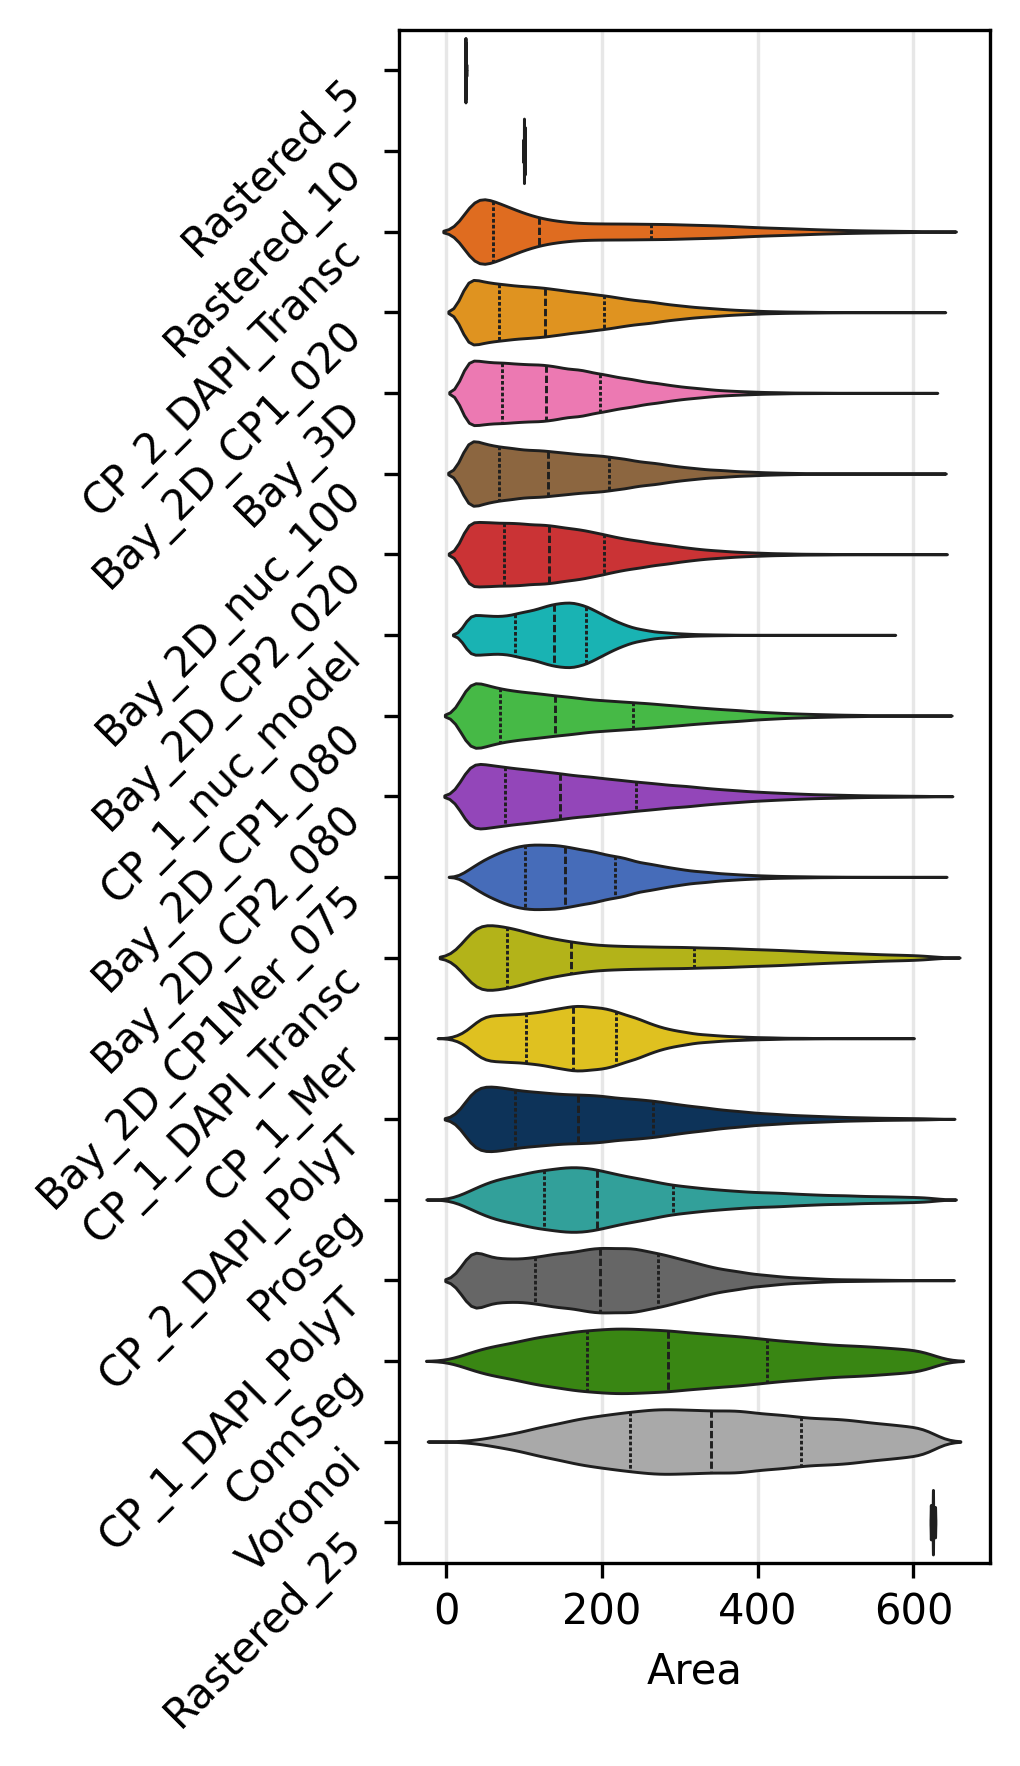

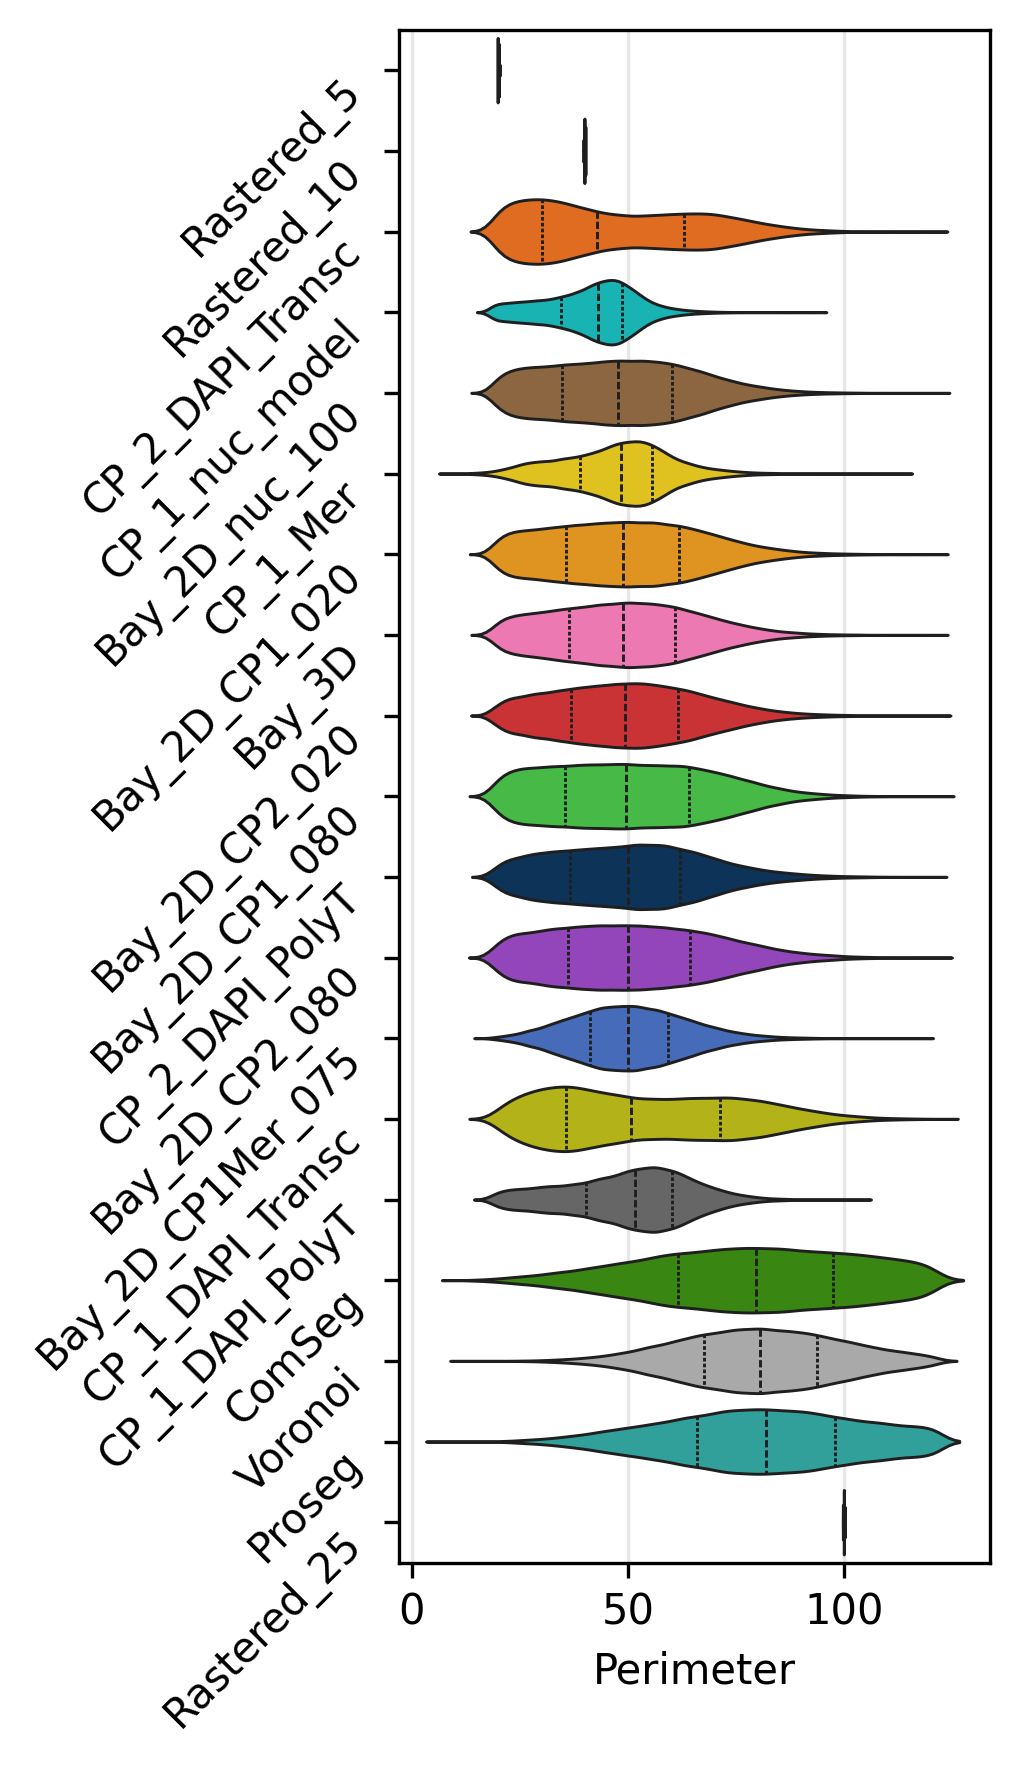

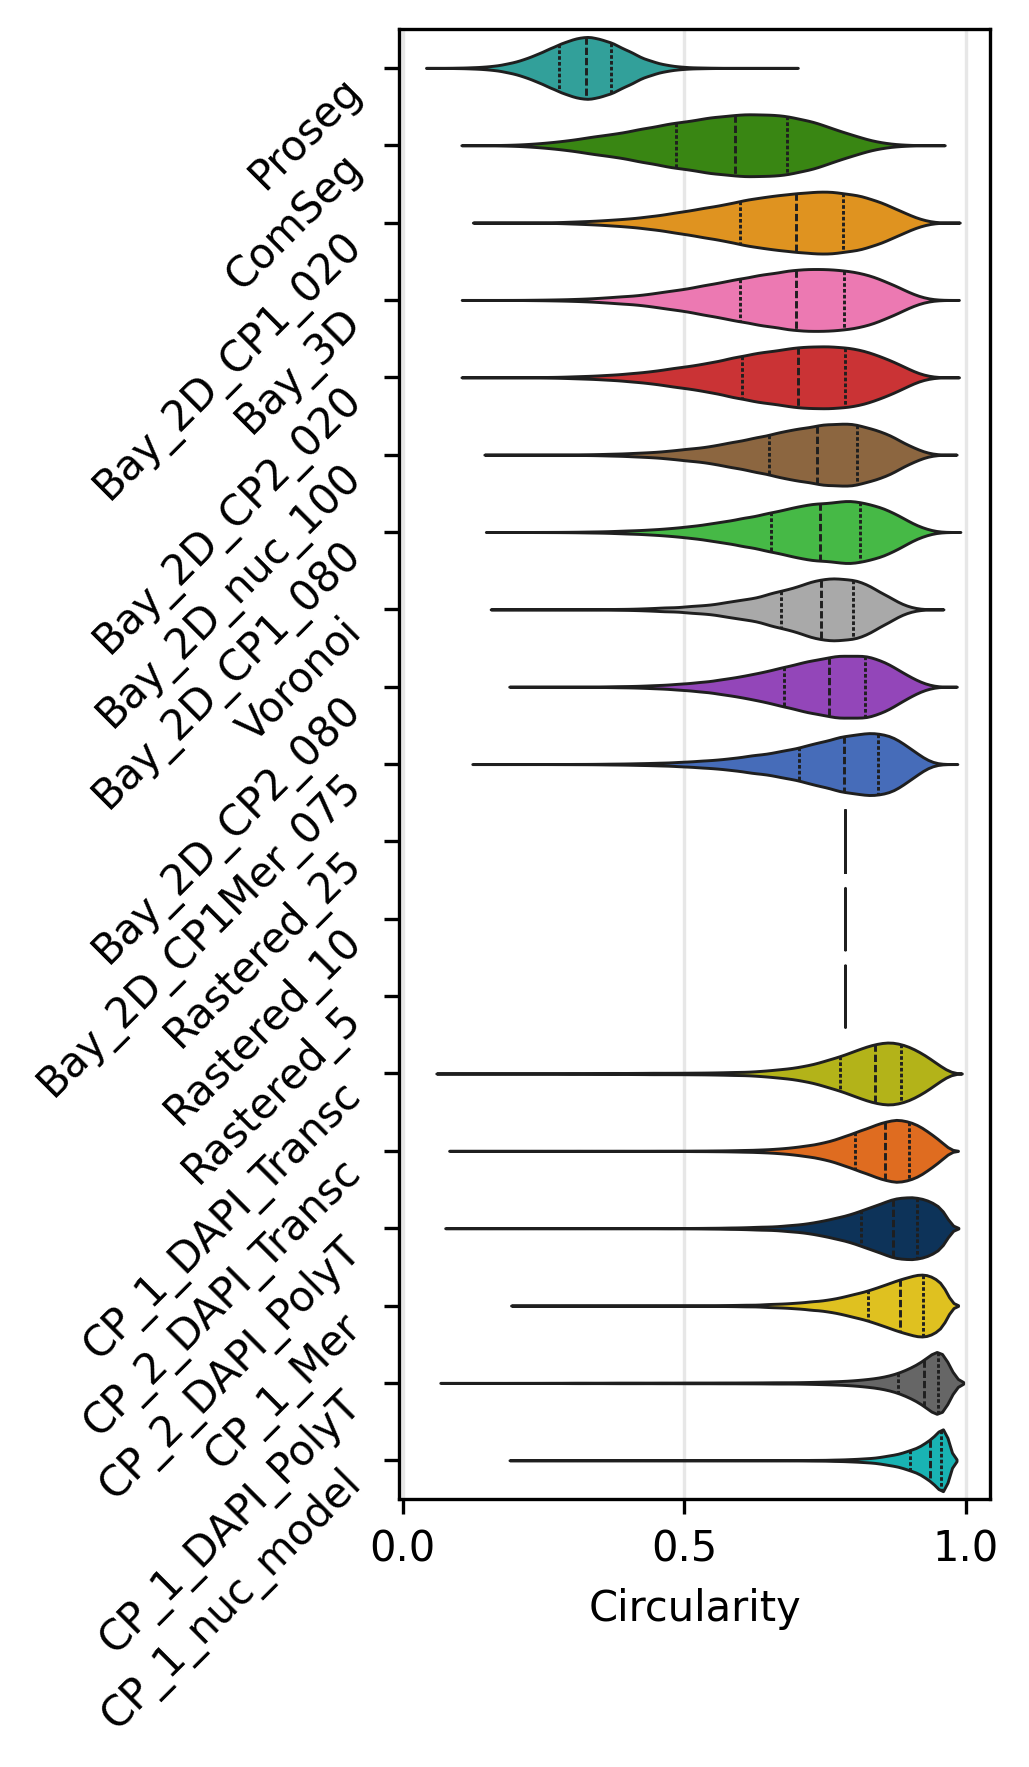

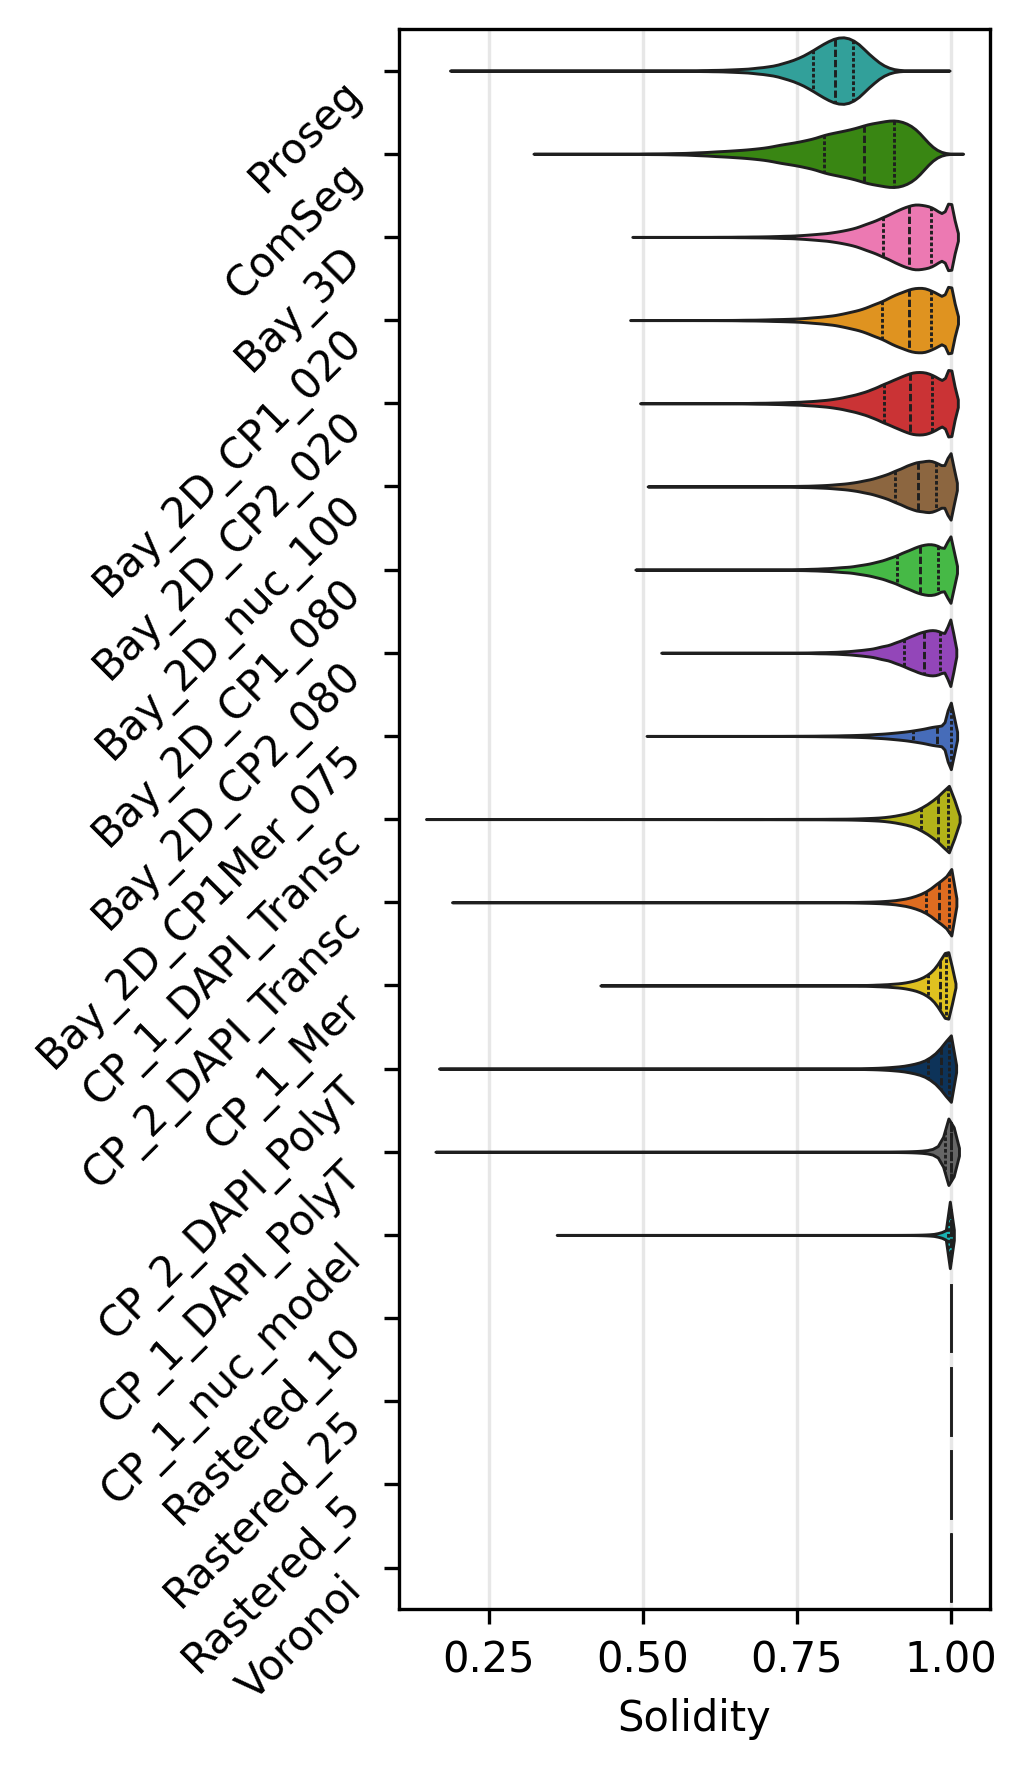

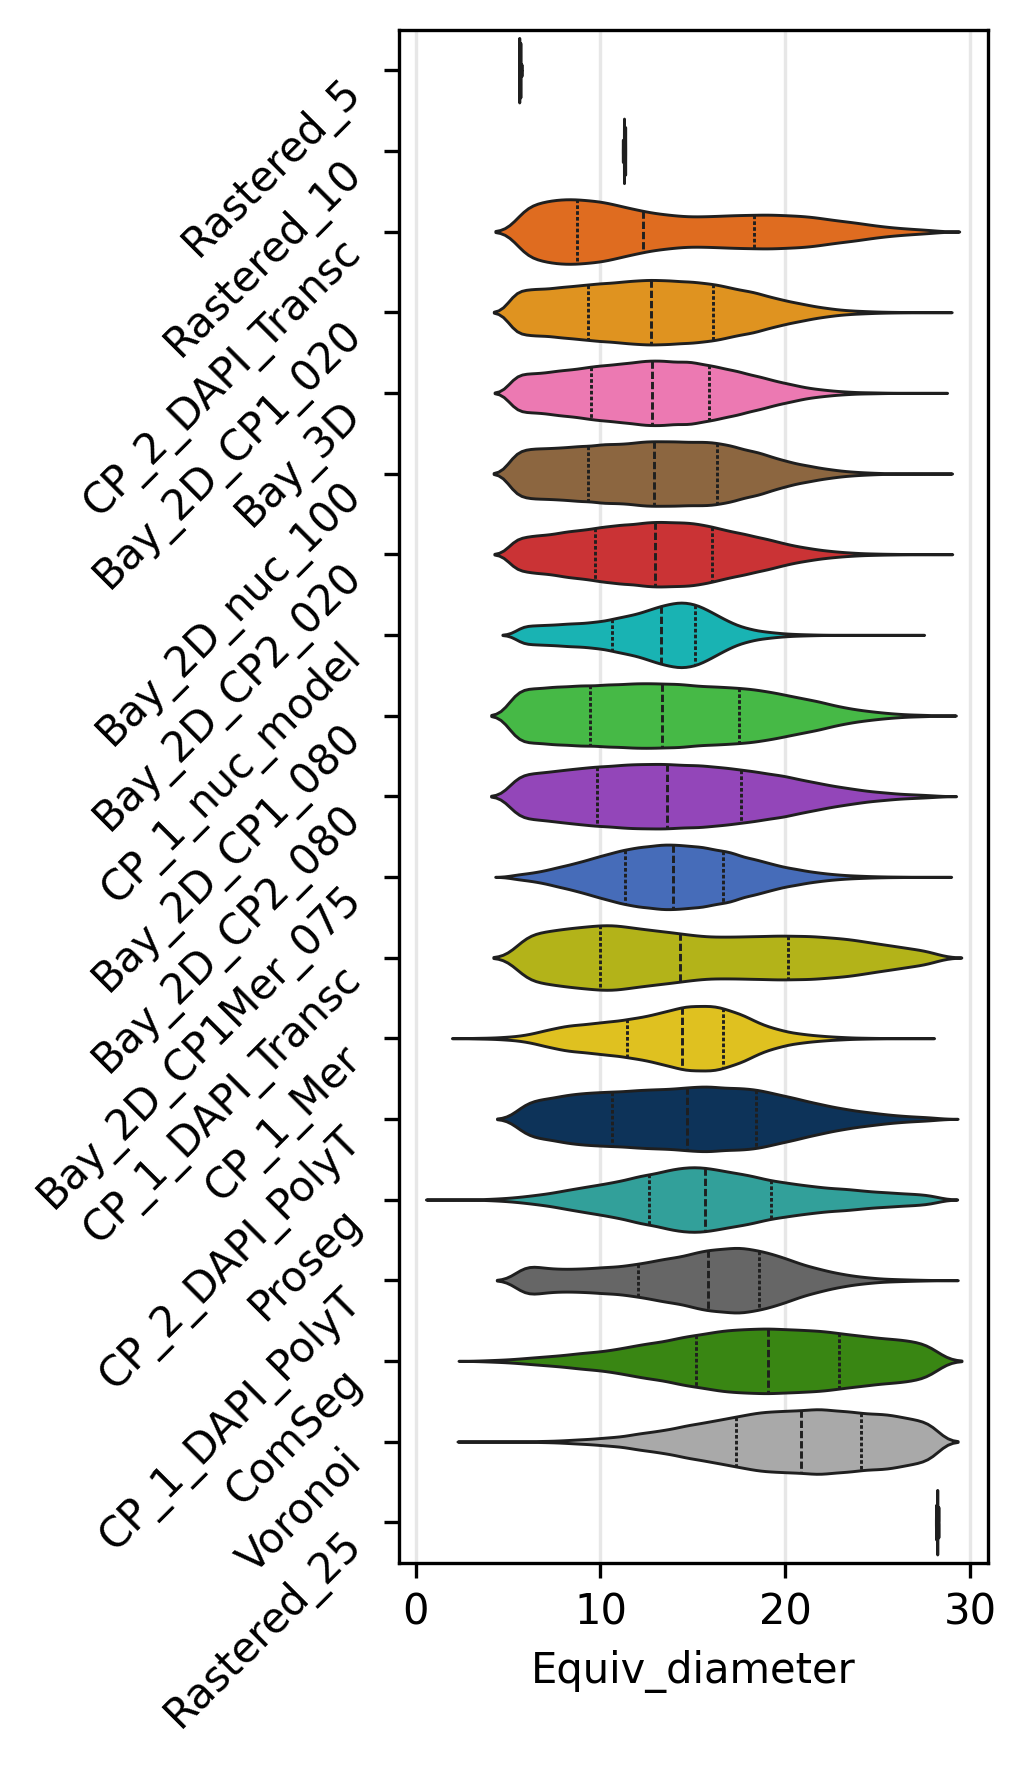

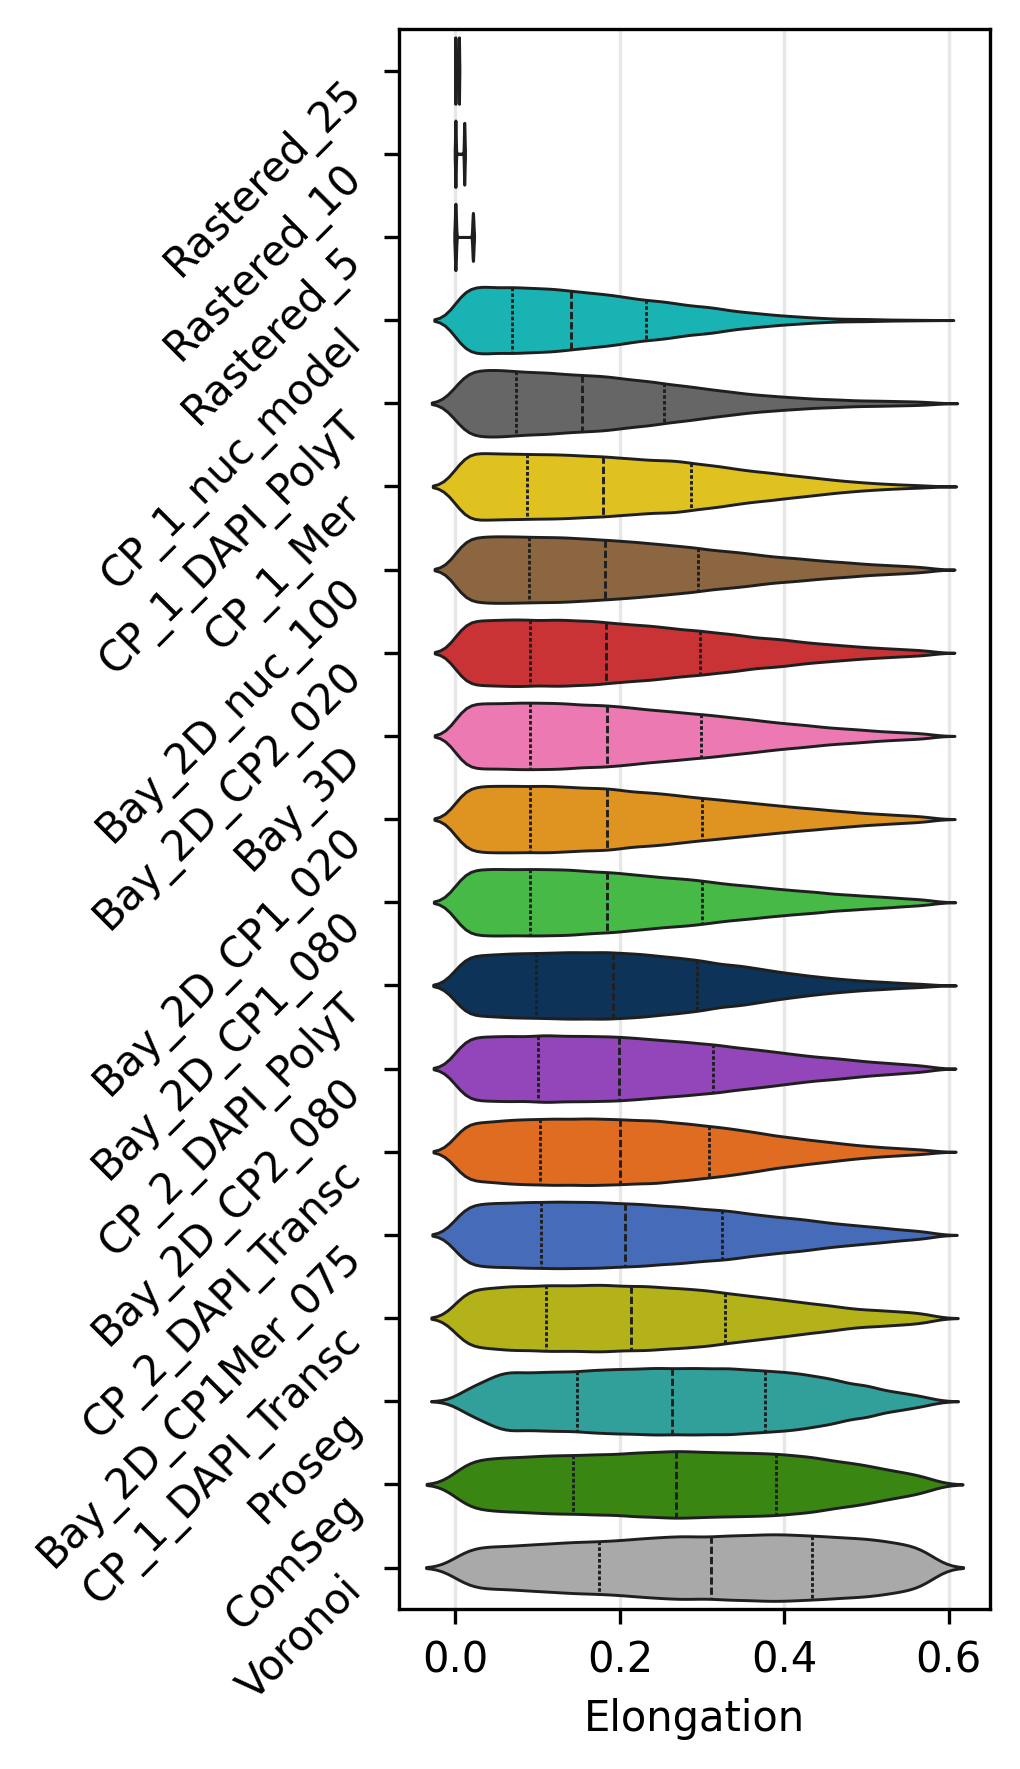

In [22]:
plot_violin_morphology(sdata, adata_keys, color_dict=color_map)

# Metrics 3D

In [12]:
import ast
import math
import warnings

import numpy as np
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union

def compute_cell_morphology(
    sdata, add_to_adata=False, z_spacing=1.5, verbose=True, return_results=False
):
    """Compute 2D or 3D morphology metrics based on geometry across z-planes per EntityID."""
    results_dict = {}

    for boundaries_name, boundaries in sdata.shapes.items():
        if not boundaries_name.startswith("boundaries_"):
            continue

        dataset_name = boundaries_name.replace("boundaries_", "")
        table_name = f"adata_{dataset_name}"

        if table_name not in sdata.tables:
            warnings.warn(f"Missing adata {table_name}. Skipping {boundaries_name}.")
            continue

        if boundaries.empty or "geometry" not in boundaries:
            warnings.warn(f"Empty/invalid geometry in {boundaries_name}. Skipping.")
            continue

        # Parse geometry from strings if needed
        boundaries = boundaries.copy()
        boundaries["geometry"] = boundaries["geometry"].apply(
            lambda x: Polygon(ast.literal_eval(x)) if isinstance(x, str) else x
        )

        if "EntityID" not in boundaries:
            warnings.warn(f"Missing EntityID in {boundaries_name}. Skipping.")
            continue

        grouped = boundaries.groupby("EntityID")
        morphology_rows = []

        for entity_id, group in grouped:
            # Detect 2D vs 3D for this specific entity
            is_entity_3d = "ZIndex" in group and group["ZIndex"].nunique() > 1
            polygons = group["geometry"].tolist()

            if not polygons:
                continue

            if is_entity_3d:
                # 3D metrics
                group = group.sort_values("ZIndex")
                z_levels = group["ZLevel"].values if "ZLevel" in group else group["ZIndex"].astype(float) * z_spacing

                total_area = sum(p.area for p in polygons)
                mean_perimeter = np.mean([p.length for p in polygons])
                total_volume = total_area * z_spacing

                circularities = [
                    4 * math.pi * p.area / (p.length ** 2) if p.length > 0 else np.nan for p in polygons
                ]
                mean_circularity = np.nanmean(circularities)

                unioned = unary_union(polygons)
                try:
                    convex_area = unioned.convex_hull.area
                    solidity = unioned.area / convex_area if convex_area > 0 else np.nan
                except Exception:
                    solidity = np.nan

                # Bounding box elongation (3D)
                bounds = np.array([p.bounds for p in polygons])
                x_min, y_min = bounds[:, 0].min(), bounds[:, 1].min()
                x_max, y_max = bounds[:, 2].max(), bounds[:, 3].max()
                z_min, z_max = np.min(z_levels), np.max(z_levels)
                bbox_dims = (x_max - x_min, y_max - y_min, z_max - z_min)

                short = min(bbox_dims)
                long = max(bbox_dims)
                elongation = 1 - (short / long) if long > 0 else np.nan

                morphology_rows.append({
                    "EntityID": entity_id,
                    "dimensionality": "3D",
                    "z_planes": len(z_levels),
                    "area": total_area,
                    "volume": total_volume,
                    "mean_perimeter": mean_perimeter,
                    "circularity": mean_circularity,
                    "solidity": solidity,
                    "elongation": elongation,
                })
            else:
                # 2D metrics
                p = polygons[0]
                if p.is_empty:
                    continue

                area = p.area
                perimeter = p.length
                circularity = 4 * math.pi * area / (perimeter ** 2) if perimeter > 0 else np.nan
                solidity = area / p.convex_hull.area if p.area > 0 else np.nan
                equiv_diameter = np.sqrt(4 * area / math.pi)

                try:
                    mbr = p.minimum_rotated_rectangle
                    coords = np.array(mbr.exterior.coords.xy)[:, :-1].T
                    edge_lengths = np.sqrt(np.diff(np.append(coords[:, 0], coords[0])) ** 2 +
                                           np.diff(np.append(coords[:, 1], coords[0])) ** 2)
                    unique_lengths = np.sort(np.unique(np.round(edge_lengths, 10)))
                    elongation = 1 - (unique_lengths[0] / unique_lengths[1]) if len(unique_lengths) >= 2 else np.nan
                except Exception:
                    elongation = np.nan

                morphology_rows.append({
                    "EntityID": entity_id,
                    "dimensionality": "2D",
                    "z_planes": 1,
                    "area": area,
                    "volume": np.nan,
                    "mean_perimeter": perimeter,
                    "circularity": circularity,
                    "solidity": solidity,
                    "elongation": elongation,
                    "equiv_diameter": equiv_diameter,
                })

        df_morph = pd.DataFrame(morphology_rows).set_index("EntityID")

        if add_to_adata:
            adata = sdata.tables[table_name]
            adata_ids = adata.obs.index.astype(str)
            common = adata_ids.intersection(df_morph.index.astype(str))
            for col in df_morph.columns:
                adata.obs[f"cell_{col}"] = np.nan
                adata.obs.loc[common, f"cell_{col}"] = df_morph.loc[common, col]

        if verbose:
            dim_counts = df_morph["dimensionality"].value_counts().to_dict()
            print(f"Added morphology metrics for {dataset_name}: {dim_counts}")

        if return_results:
            results_dict[dataset_name] = df_morph

    return results_dict if return_results else None


In [25]:
subset_sdata = sd.SpatialData(
    points=sdata.points,
    tables=sdata.tables,
    shapes={"boundaries_vpt_3D_DAPI_PolyT": sdata.shapes["boundaries_vpt_3D_DAPI_PolyT"]},
)

/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'boundaries_Baysor_2D_Cellpose_1_DAPI_PolyT_0.2', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'boundaries_Baysor_2D_Cellpose_1_DAPI_PolyT_0.8', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'boundaries_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/ubuntu/miniforge3/envs/cellseg_benchmark/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: 

In [27]:
subset_sdata

SpatialData object
├── Points
│     └── 'foxf2_s2_r1_transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     └── 'boundaries_vpt_3D_DAPI_PolyT': GeoDataFrame shape: (429292, 5) (2D shapes)
└── Tables
      ├── 'adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.2': AnnData (181678, 500)
      ├── 'adata_Baysor_2D_Cellpose_1_DAPI_PolyT_0.8': AnnData (164856, 500)
      ├── 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.2': AnnData (174569, 500)
      ├── 'adata_Baysor_2D_Cellpose_1_DAPI_Transcripts_0.8': AnnData (151323, 500)
      ├── 'adata_Baysor_2D_Cellpose_1_nuclei_model_1.0': AnnData (180656, 500)
      ├── 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.2': AnnData (174102, 500)
      ├── 'adata_Baysor_2D_Cellpose_2_DAPI_PolyT_0.8': AnnData (150218, 500)
      ├── 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.2': AnnData (173855, 500)
      ├── 'adata_Baysor_2D_Cellpose_2_DAPI_Transcripts_0.8': AnnData (151895, 500)
      ├── 'adata_Baysor_3D': AnnData (149500, 550)
      

In [30]:
results = compute_cell_morphology(subset_sdata, return_results=True)

Added morphology metrics for vpt_3D_DAPI_PolyT: {'3D': 98338, '2D': 51617}


In [31]:
results

{'vpt_3D_DAPI_PolyT':                     dimensionality  z_planes        area      volume  \
 EntityID                                                               
 2688188500005100003             3D         4  133.643588  200.465382   
 2688188500005100004             3D         2   25.038879   37.558318   
 2688188500005100007             3D         3   36.938203   55.407304   
 2688188500005100008             3D         3   80.722918  121.084377   
 2688188500005100009             3D         5  277.430372  416.145558   
 ...                            ...       ...         ...         ...   
 2688188500541100099             2D         1    7.063171         NaN   
 2688188500541100102             2D         1    8.505845         NaN   
 2688188500541100115             2D         1    7.744265         NaN   
 2688188500541100116             2D         1   11.089538         NaN   
 2688188500541100126             2D         1    7.102662         NaN   
 
                      mean_p

In [34]:
results["vpt_3D_DAPI_PolyT"].dimensionality.value_counts()

dimensionality
3D    98338
2D    51617
Name: count, dtype: int64

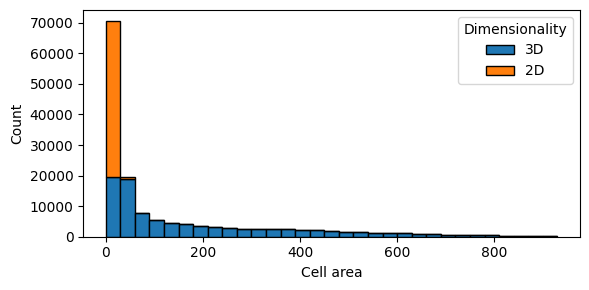

In [66]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_areas = [df[df["dimensionality"] == d]["area"].values for d in dim_order if d in df["dimensionality"].unique()]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top 0.5% outliers
all_areas = np.concatenate(grouped_areas)
cutoff = np.percentile(all_areas, 99.5)
filtered_groups = [areas[areas <= cutoff] for areas in grouped_areas]

bin_width = 30
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(6, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.xlabel("Cell area")
plt.ylabel("Count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


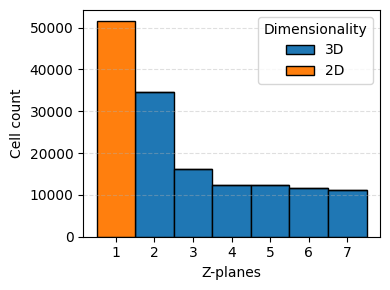

In [63]:
import matplotlib.pyplot as plt
import numpy as np

z = results["vpt_3D_DAPI_PolyT"]["z_planes"]
groups = [z[z > 1], z[z == 1]]
labels = ["3D", "2D"]
bins = np.arange(z.min() - 0.5, z.max() + 1.5)

plt.figure(figsize=(4, 3))
plt.hist(groups, bins=bins, stacked=True, edgecolor="black", label=labels)
plt.xlabel("Z-planes")
plt.ylabel("Cell count")
plt.xticks(np.arange(z.min(), z.max() + 1))
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()

# Further Tests

In [166]:
import ast
import math
import warnings
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon, Point
from shapely.ops import unary_union
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_cell_morphology(
    sdata, add_to_adata=False, z_spacing=1.5, verbose=True, return_results=False
):
    """Compute 2D or 3D morphology metrics with compatible measurements."""
    results_dict = {}

    for boundaries_name, boundaries in sdata.shapes.items():
        if not boundaries_name.startswith("boundaries_"):
            continue

        dataset_name = boundaries_name.replace("boundaries_", "")
        table_name = f"adata_{dataset_name}"

        if table_name not in sdata.tables:
            warnings.warn(f"Missing adata {table_name}. Skipping {boundaries_name}.")
            continue

        if boundaries.empty or "geometry" not in boundaries:
            warnings.warn(f"Empty/invalid geometry in {boundaries_name}. Skipping.")
            continue

        # Parse geometry from strings if needed
        boundaries = boundaries.copy()
        boundaries["geometry"] = boundaries["geometry"].apply(
            lambda x: Polygon(ast.literal_eval(x)) if isinstance(x, str) else x
        )

        if "EntityID" not in boundaries:
            warnings.warn(f"Missing EntityID in {boundaries_name}. Skipping.")
            continue

        grouped = boundaries.groupby("EntityID")
        morphology_rows = []

        for entity_id, group in grouped:
            try:
                is_entity_3d = "ZIndex" in group and group["ZIndex"].nunique() > 1
                polygons = group["geometry"].tolist()

                if not polygons:
                    continue

                if is_entity_3d:
                    morphology_data = compute_3d_metrics(group, polygons, z_spacing, verbose=verbose)
                else:
                    morphology_data = compute_2d_metrics(polygons[0], z_spacing)

                morphology_data["EntityID"] = entity_id
                morphology_rows.append(morphology_data)
            except Exception as e:
                warnings.warn(f"Failed to process entity {entity_id}: {str(e)}")
                continue

        if morphology_rows:
            df_morph = pd.DataFrame(morphology_rows).set_index("EntityID")

            if add_to_adata:
                adata = sdata.tables[table_name]
                adata_ids = adata.obs.index.astype(str)
                common = adata_ids.intersection(df_morph.index.astype(str))
                for col in df_morph.columns:
                    adata.obs[f"cell_{col}"] = np.nan
                    adata.obs.loc[common, f"cell_{col}"] = df_morph.loc[common, col]

            if verbose:
                dim_counts = df_morph["dimensionality"].value_counts().to_dict()
                print(f"Added morphology metrics for {dataset_name}: {dim_counts}")

            if return_results:
                results_dict[dataset_name] = df_morph

    return results_dict if return_results else None

def compute_2d_metrics(geom, z_spacing):
    """Compute 2D morphology metrics with improved robustness."""
    try:
        if geom.geom_type == 'MultiPolygon':
            geom = unary_union(geom)
            if geom.geom_type == 'MultiPolygon':
                geom = max(geom.geoms, key=lambda p: p.area)

        if geom.is_empty or geom.geom_type != 'Polygon':
            return {}

        area = geom.area
        perimeter = geom.length

        metrics = {
            "dimensionality": "2D",
            "area": area,
            "volume": area * z_spacing,
            "num_z_planes": 1,
            "size_normalized": np.sqrt(area),
            "surface_to_volume_ratio": perimeter / area if area > 0 else np.nan,
        }

        metrics["sphericity"] = (
            4 * math.pi * area / (perimeter ** 2) if perimeter > 0 else np.nan
        )

        try:
            convex_hull = geom.buffer(0).convex_hull
            metrics["solidity"] = area / convex_hull.area if convex_hull.area > 0 else np.nan
        except:
            metrics["solidity"] = np.nan

        try:
            hull_points = np.array(convex_hull.exterior.coords[:-1])
            if len(hull_points) >= 3:
                hull_points = StandardScaler().fit_transform(hull_points)
                pca = PCA(n_components=2)
                pca.fit(hull_points)
                eigenvalues = pca.explained_variance_
                metrics["elongation"] = (
                    1 - np.sqrt(eigenvalues[1] / eigenvalues[0]) if eigenvalues[0] > 0 else np.nan
                )
            else:
                metrics["elongation"] = np.nan
        except:
            metrics["elongation"] = np.nan

        return metrics
    except Exception as e:
        warnings.warn(f"Failed to compute 2D metrics: {str(e)}")
        return {}

def compute_3d_metrics(group, polygons, z_spacing, verbose=False):
    """Compute 3D morphology metrics with improved robustness."""
    try:
        group = group.sort_values("ZIndex")

        areas = np.array([p.area if p.geom_type == 'Polygon' else
                         sum(part.area for part in p.geoms)
                         for p in polygons])

        volume = np.sum(areas) * z_spacing

        perimeters = np.array([p.length if p.geom_type == 'Polygon' else
                              sum(part.length for part in p.geoms)
                              for p in polygons])

        total_height = (len(areas) - 1) * z_spacing
        lateral_surface = np.mean(perimeters) * total_height if len(perimeters) > 1 else 0
        top_bottom_surface = areas[0] + areas[-1] if len(areas) > 0 else 0
        surface_area = lateral_surface + top_bottom_surface

        metrics = {
            "dimensionality": "3D",
            "area": surface_area,
            "volume": volume,
            "num_z_planes": len(areas),
            "size_normalized": np.cbrt(volume) if volume > 0 else np.nan,
            "surface_to_volume_ratio": surface_area / volume if volume > 0 else np.nan,
        }

        if volume > 0 and surface_area > 0:
            metrics["sphericity"] = (math.pi ** (1/3) * (6 * volume) ** (2/3)) / surface_area
        else:
            metrics["sphericity"] = np.nan

        all_points = []
        for i, polygon in enumerate(polygons):
            if polygon.is_empty or not polygon.is_valid:
                continue
            try:
                if polygon.geom_type == 'Polygon':
                    coords = np.array(polygon.exterior.coords[:-1])
                else:
                    coords = np.concatenate(
                        [np.array(part.exterior.coords[:-1]) for part in polygon.geoms]
                    )
                if len(coords) < 3:
                    continue
                z = i * z_spacing
                z_coords = np.full(len(coords), z)
                points_3d = np.column_stack([coords, z_coords])
                all_points.extend(points_3d)
            except:
                continue

        if not all_points:
            metrics.update({"solidity": np.nan, "elongation": np.nan})
            return metrics

        all_points = np.array(all_points)
        all_points = all_points - np.mean(all_points, axis=0)

        try:
            # Check if the point cloud has sufficient depth (3D spread)
            if np.ptp(all_points[:, 2]) < z_spacing * 3:
                metrics["solidity"] = np.nan
            else:
                hull = ConvexHull(all_points)
                hull_volume = hull.volume

                if hull_volume > 0:
                    solidity = volume / hull_volume
                    if solidity > 1.0:
                        if verbose:
                            warnings.warn(
                                f"[3D] Solidity > 1.0: Volume={volume:.2f}, Hull Volume={hull_volume:.2f}, "
                                f"Solidity={solidity:.2f}"
                            )
                        #metrics["solidity"] = np.nan
                        metrics["solidity"] = solidity
                    else:
                        metrics["solidity"] = solidity
                else:
                    metrics["solidity"] = np.nan
        except Exception as e:
            metrics["solidity"] = np.nan

        try:
            pca = PCA(n_components=3)
            pca.fit(all_points)
            eigenvalues = np.sort(pca.explained_variance_)[::-1]

            if eigenvalues[2] > 1e-6:
                metrics["elongation"] = 1 - np.sqrt(eigenvalues[2] / eigenvalues[0])
            elif eigenvalues[1] > 1e-6:
                metrics["elongation"] = 1 - np.sqrt(eigenvalues[1] / eigenvalues[0])
            else:
                metrics["elongation"] = 1.0
        except Exception as e:
            warnings.warn(f"Failed to compute elongation: {str(e)}")
            metrics["elongation"] = np.nan

        return metrics

    except Exception as e:
        warnings.warn(f"Failed to compute 3D metrics: {str(e)}")
        return {}

In [167]:
%%time
results = compute_cell_morphology(subset_sdata, return_results=True, verbose=False)

CPU times: user 4min 11s, sys: 417 ms, total: 4min 12s
Wall time: 4min 12s


In [168]:
results

{'vpt_3D_DAPI_PolyT':                     dimensionality        area      volume  num_z_planes  \
 EntityID                                                                   
 2688188500005100003             3D  129.931030  200.465382             4   
 2688188500005100004             3D   44.360305   37.558318             2   
 2688188500005100007             3D   62.487800   55.407304             3   
 2688188500005100008             3D  104.937543  121.084377             3   
 2688188500005100009             3D  331.123752  416.145558             5   
 ...                            ...         ...         ...           ...   
 2688188500541100099             2D    7.063171   10.594756             1   
 2688188500541100102             2D    8.505845   12.758768             1   
 2688188500541100115             2D    7.744265   11.616398             1   
 2688188500541100116             2D   11.089538   16.634306             1   
 2688188500541100126             2D    7.102662   10.65

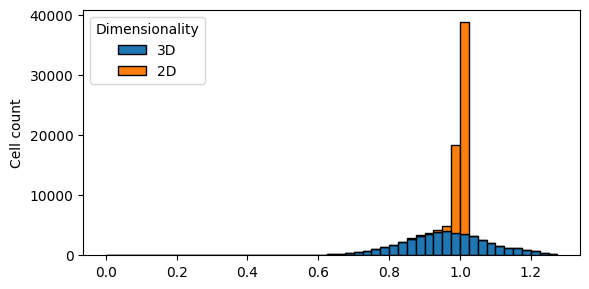

In [169]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_elong = [
    df[df["dimensionality"] == d]["solidity"].dropna().values
    for d in dim_order if d in df["dimensionality"].unique()
]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top outliers
all_elong = np.concatenate(grouped_elong)
cutoff = np.percentile(all_elong, 99.9)
filtered_groups = [x[x <= cutoff] for x in grouped_elong]

bin_width = 0.025
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(6, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.ylabel("Cell count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


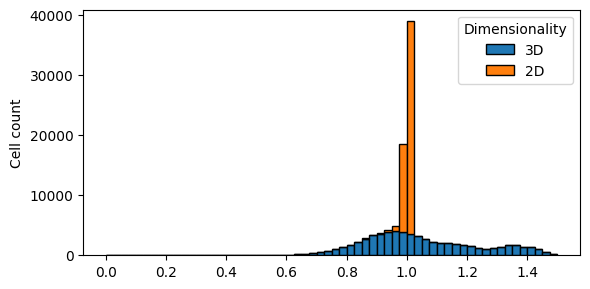

In [163]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_elong = [
    df[df["dimensionality"] == d]["solidity"].dropna().values
    for d in dim_order if d in df["dimensionality"].unique()
]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top outliers
all_elong = np.concatenate(grouped_elong)
cutoff = np.percentile(all_elong, 99.9)
filtered_groups = [x[x <= cutoff] for x in grouped_elong]

bin_width = 0.025
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(6, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.ylabel("Cell count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


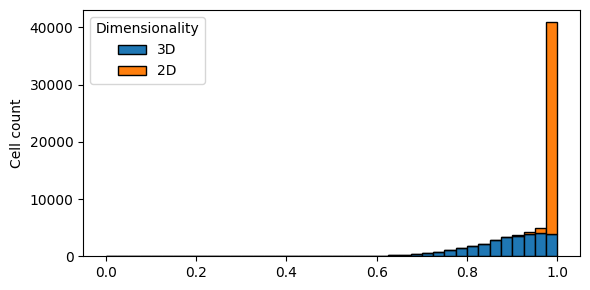

In [153]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_elong = [
    df[df["dimensionality"] == d]["solidity"].dropna().values
    for d in dim_order if d in df["dimensionality"].unique()
]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top 0.5% outliers
all_elong = np.concatenate(grouped_elong)
cutoff = np.percentile(all_elong, 99.5)
filtered_groups = [x[x <= cutoff] for x in grouped_elong]

bin_width = 0.025
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(6, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.ylabel("Cell count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


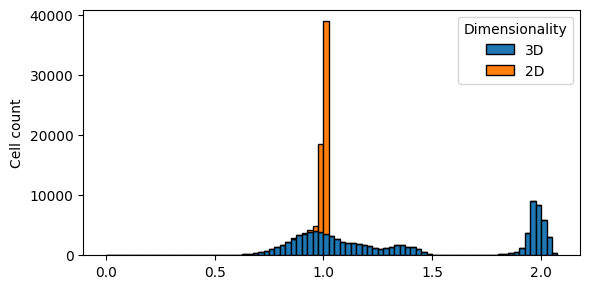

In [145]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_elong = [
    df[df["dimensionality"] == d]["solidity"].dropna().values
    for d in dim_order if d in df["dimensionality"].unique()
]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top 0.5% outliers
all_elong = np.concatenate(grouped_elong)
cutoff = np.percentile(all_elong, 99.5)
filtered_groups = [x[x <= cutoff] for x in grouped_elong]

bin_width = 0.025
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(6, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.ylabel("Cell count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


In [130]:
# Interpreting elongation
# 0.0: Perfect sphere/circle (1:1 aspect ratio)
# 0.3: Slightly elongated (1.5:1 aspect ratio)
# 0.5: Moderately elongated (2:1 aspect ratio)
# 0.7: Clearly elongated (3:1 aspect ratio)
# 0.9: Highly elongated (10:1 aspect ratio)
# 1.0: Extremely elongated rod/fiber

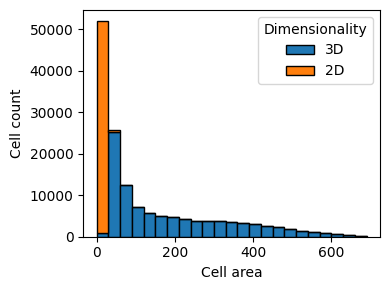

In [134]:
import matplotlib.pyplot as plt
import numpy as np

df = results["vpt_3D_DAPI_PolyT"]

dim_order = ["3D", "2D"]
grouped_areas = [df[df["dimensionality"] == d]["area"].values for d in dim_order if d in df["dimensionality"].unique()]
labels = [d for d in dim_order if d in df["dimensionality"].unique()]

# Concatenate and remove top 0.5% outliers
all_areas = np.concatenate(grouped_areas)
cutoff = np.percentile(all_areas, 99.5)
filtered_groups = [areas[areas <= cutoff] for areas in grouped_areas]

bin_width = 30
bins = np.arange(0, cutoff + bin_width, bin_width)

plt.figure(figsize=(4, 3))
plt.hist(filtered_groups, bins=bins, stacked=True, label=labels, edgecolor="black")

plt.xlabel("Cell area")
plt.ylabel("Cell count")
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()


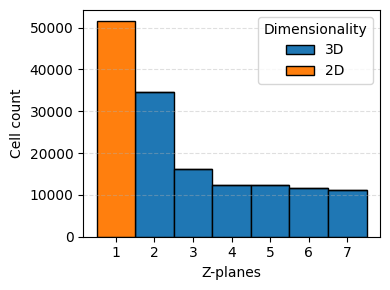

In [133]:
import matplotlib.pyplot as plt
import numpy as np

z = results["vpt_3D_DAPI_PolyT"]["num_z_planes"]
groups = [z[z > 1], z[z == 1]]
labels = ["3D", "2D"]
bins = np.arange(z.min() - 0.5, z.max() + 1.5)

plt.figure(figsize=(4, 3))
plt.hist(groups, bins=bins, stacked=True, edgecolor="black", label=labels)
plt.xlabel("Z-planes")
plt.ylabel("Cell count")
plt.xticks(np.arange(z.min(), z.max() + 1))
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Dimensionality")
plt.tight_layout()
plt.show()